# checking benford's law against historical daily price and volume data for all US-based stocks and ETFs trading on the NYSE, NASDAQ, and NYSE MKT.

In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import math
import os

def firstDigit(number):
    if number == 0:
        return 0
    else:
        digits = (int)(math.log10(number)) 
        number = (int)(number / pow(10, digits)) 
        return number
    
    
def graph(data,col_name):
    col = data
    length = len(col)
    
    dict_freq = {}
    for i in range(1,10):
        dict_freq[str(i)] = 0
    for i in col:
        if i>0:
            f_digit = firstDigit(i)
            dict_freq[str(f_digit)]+=1

    benford_dict = {}
    for i in range(1,10):
        benford_dict[str(i)] = math.log10(1+1/i)
    freq_ben = np.array(list(benford_dict.values()))
    total_entries = 0
    for i in list(dict_freq.values()):
        total_entries+=i
        
        
    digits = list(dict_freq.keys())
    frequency = list(dict_freq.values())
    benford_freq = freq_ben * total_entries

    fig = plt.figure(figsize = (8, 3))
    plt.bar(range(len(dict_freq)),frequency,tick_label=digits,color = 'orange')
    plt.plot(digits,frequency,label=f"Realtime-{col_name} Metric Analysis",color='black',linestyle='dashed',linewidth=3,marker='o')
    plt.plot(digits,benford_freq,label="Actual Benford's Analysis",color='blue',linestyle='dashed',linewidth=3,marker='*')
    plt.xlabel('Digits')
    plt.ylabel('Frequency')
    plt.legend()
    plt.savefig(f'result_{col_name}.png', dpi=300, bbox_inches='tight')
    plt.show()
#     print(dict_freq)

# All

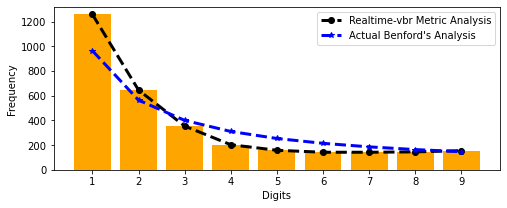

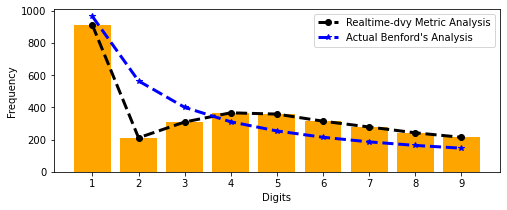

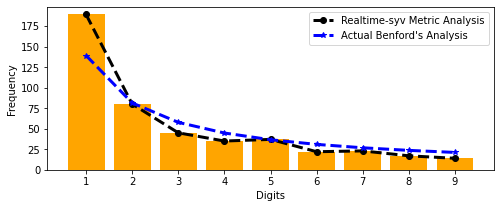

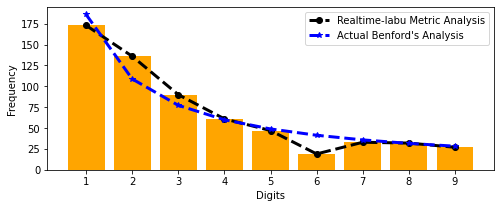

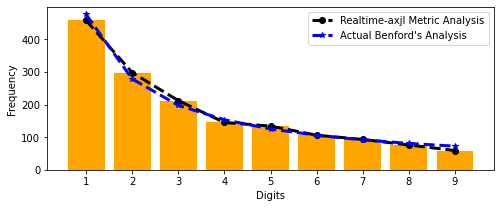

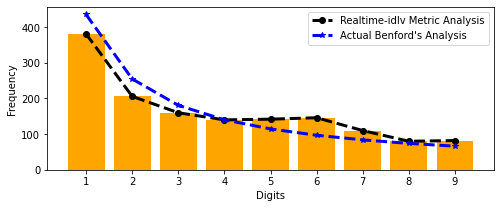

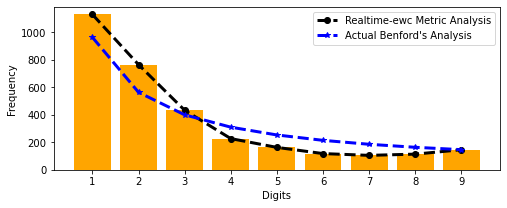

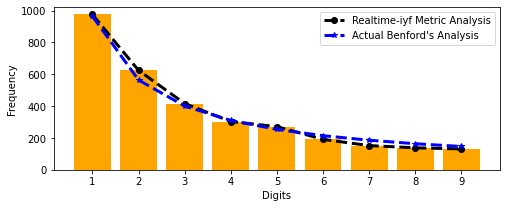

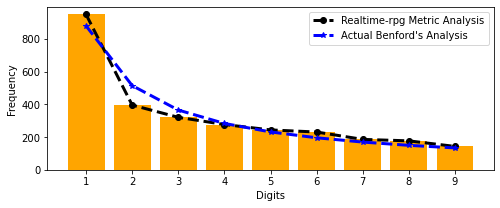

In [57]:
import os
files = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        files.append(os.path.join(dirname, filename))
        
for index in range(0,49):
    Volume = np.asarray(pd.read_csv(files[index])['Volume'])
    print(files[index])
    graph(Volume,os.path.basename(files[index].split('.')[0]))